<h3 style="color:green">Predicting Sale Price of Homes in King County, WA</h3>
<h3 style="color:green">Random Forest Model</h3><br><br>

<h4 style="color:red; margin-top: 1px">Team Members</h4>

#### Alexandre Makhmudyantsev
#### Brandon Nguyen
#### Ryan Martin Elli Cervantes
#### Triet Lieu<br><br>

<a id="load_section"></a><p style="font-size: 20px; font-weight: bold; color:green">Table of Contents</p>
#### [Load Libraries & DataSet](#load)
#### [Check For Missing Data](#check)
#### [Plot Price & Grade](#plot)
#### [Split Into Training & Test Subsets](#splitdataset)
#### [Train Random Forests](#train)
#### [Test & Measure Model](#test)

<a id="intro"></a><p style="font-size: 20px; font-weight: bold; color:green">Introduction</p>

<p style="font-size: 15px; line-height: 2;">The dataset represents <b>21613 homes sold in King County</b>, WA state from the year of May 2014 to May 2015<br>
19 columns (+ price response variable) hold the value of each home's features,<br>
but several will not be used in the random forest model...

- <b>date</b>: Outside of the scope of this study. Is factor of environment and not home
- <b>sqft_living</b>: Sum of sqft_above and sqft_basement, so those 2 already contain sqft_living
- <b>floors</b>: Number of floors is already contained in sqft_living
- <b>yr_renovated</b>: Most entries will have zero value because those homes are not renovated
- <b>lat[titude], long[itude], zipcode, date</b>: Miniscule variation in these features in this localed dataset
    
<p style="font-size: 15px; line-height: 2;">King County, WA contains the city of Seattle and is majority suburb, so median incomes<br>and home prices border those of the median in America

<a id="load"></a><p style="font-size: 20px; font-weight: bold; color:green">Load Libraries & DataSet</p>

In [5]:
from __future__ import division, print_function
import pandas as pd
from pandas.plotting import scatter_matrix  
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
pd.set_option('display.float_format', lambda x: '%.3f' % x)

homes = pd.read_csv("../../data/kc_house_data.csv")


In [6]:
print(f"All {len(homes.columns)} columns in kc_house_data.csv")
homes.columns

All 21 columns in kc_house_data.csv


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
del homes["sqft_living"]
del homes["floors"]
del homes["yr_renovated"]
del homes["lat"]
del homes["long"]
del homes["zipcode"]

homes.columns[1:] # Exclude id

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<a id="check"></a><p style="font-size: 20px; font-weight: bold; color:green">Check For Missing Data</p>

In [8]:
counts = homes.isnull().sum()
missing = pd.concat([counts], axis=1, keys=['counts'])
print(missing[1:])
print("\nThere is ", end="")
print("" if missing['counts'].sum() else "no", end="")
print(" missing data", end="")

               counts
date                0
price               0
bedrooms            0
bathrooms           0
sqft_lot            0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
sqft_living15       0
sqft_lot15          0

There is no missing data

<a id="#plot"></a><p style="font-size: 20px; font-weight: bold; color:green">Plot Price & Grade</p>

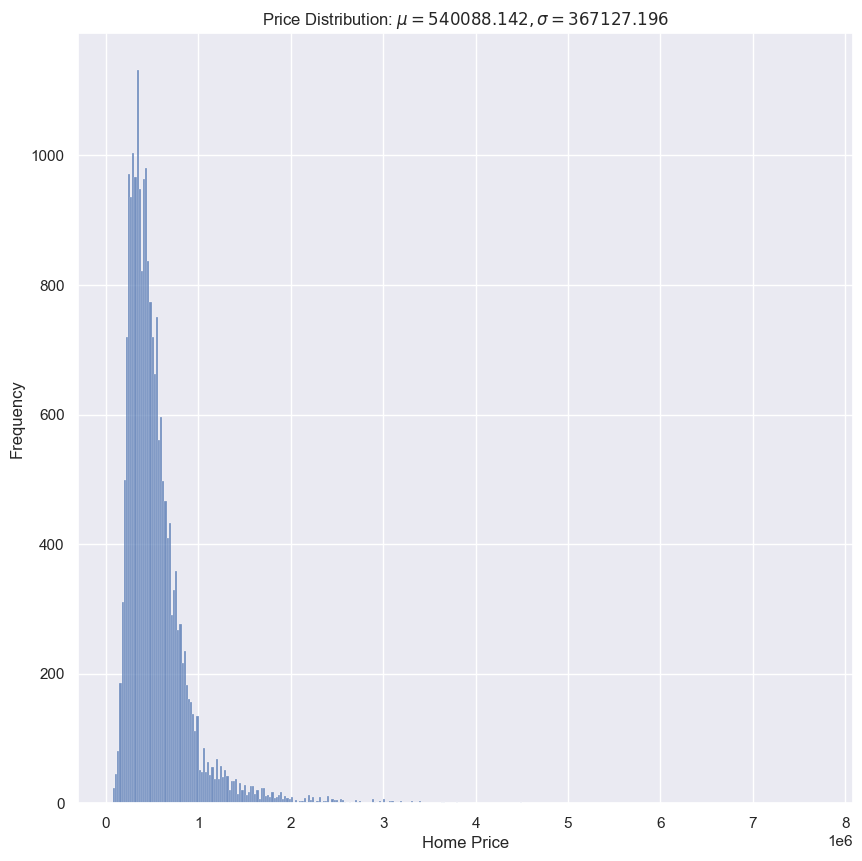

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10, 10)})

mu = homes['price'].mean()
sigma = homes['price'].std()
plt.xlabel('Home Price')
plt.ylabel('Frequency')

plt.title(r'Price Distribution: $\mu= %.3f,\sigma=%.3f$'%(mu, sigma))
sns.histplot(data = homes, x = 'price');

Text(0, 0.5, 'Price (Hundred-Thousand $)')

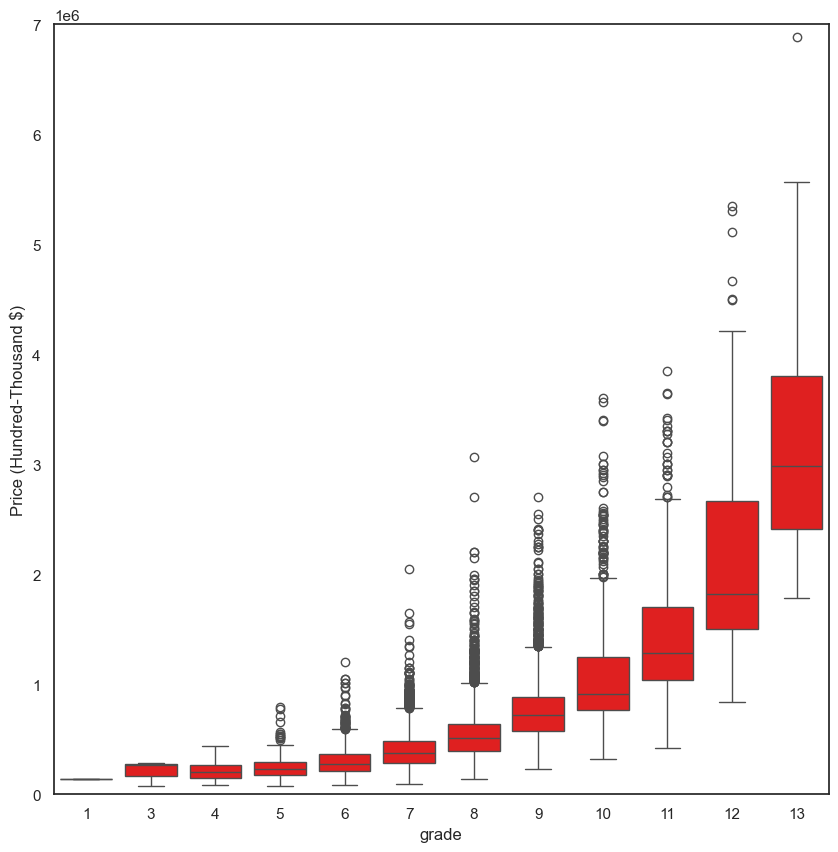

In [10]:
sns.set(style="white")
fig = sns.boxplot(x='grade', y="price", data=homes, color="red")
fig.axis(ymin=0, ymax=7e6);
fig.set_ylabel("Price (Hundred-Thousand $)")

<p style="font-size: 15px; line-height: 2;">As expected, price increases as grade/construction quality increases<br>
But also note, as grade increases, variance in prices for each grade widens

<a id="splitdataset"></a><p style="font-size: 20px; font-weight: bold; color:green">Split Into Training & Test Subsets</p>

<p style="font-size: 15px; line-height: 2;">Use a 3:1 train:test ratio

In [11]:
homes_train, homes_test = train_test_split(homes, test_size = 0.25)
print(f"There are {len(homes_train)} entires in the train set")
print(f"There are  {len(homes_test)} entires in the test  set")

There are 16209 entires in the train set
There are  5404 entires in the test  set


<a id="train"></a><p style="font-size: 20px; font-weight: bold; color:green">Train Random Forests</p>

In [12]:
tree_model = RandomForestRegressor(random_state = 9999)

Y_train = homes_train.loc[:, ['price']]

In [13]:
# Unused features: floors, yr_renovated, sqft_living15, sqft_lot15

X_train = homes_train.loc[:, ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built']]
X_test  = homes_test .loc[:, ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built']]

tree_model = tree_model.fit(X_train, Y_train.values.ravel())

In [14]:
X_train['pred_price'] = tree_model.predict(X_train)

train_result = round(np.power(homes_train['price'].corr(X_train['pred_price']), 2), 4)

print('Train: Random Forest r^2 Accounted: ', train_result)

Train: Random Forest r^2 Accounted:  0.9657


<a id="test"></a><p style="font-size: 20px; font-weight: bold; color:green">Test & Measure Model</p>

In [15]:
X_test['pred_price'] = tree_model.predict(X_test)

test_result = round(np.power(homes_test['price'].corr(X_test['pred_price']), 2), 4)

print('Test : Random Forest r^2 Accounted: ', test_result)

Test : Random Forest r^2 Accounted:  0.7226


Text(0.5, 1.0, 'Feature Importance')

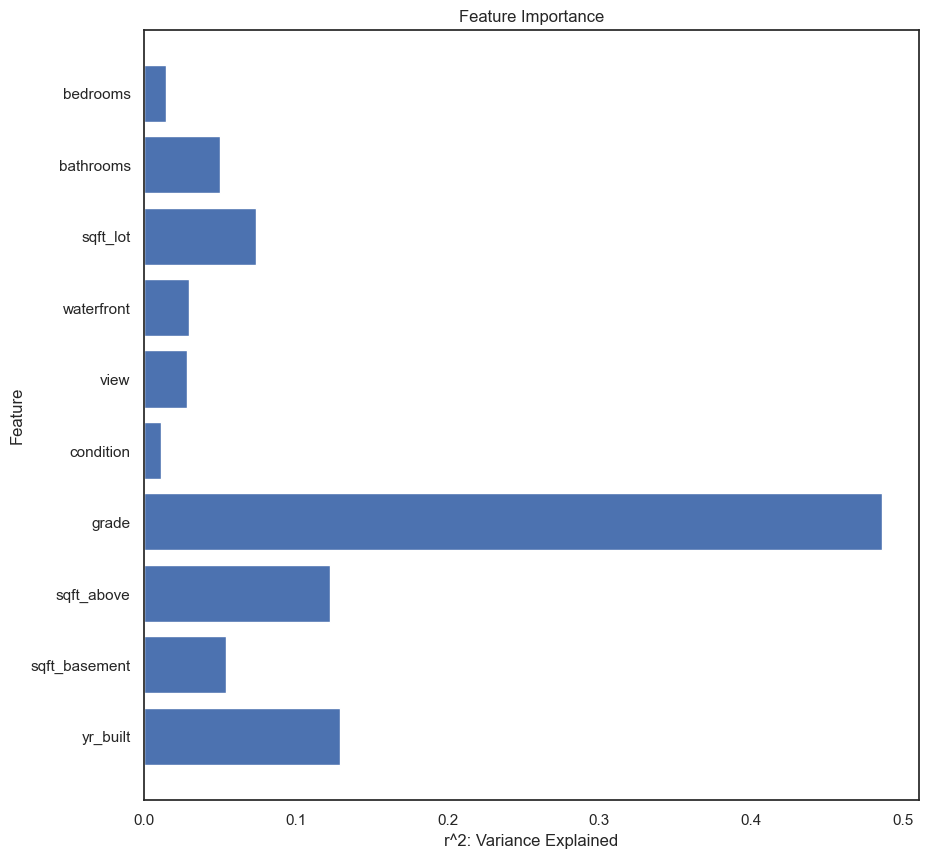

In [16]:
plt.barh(X_train.columns[-2::-1], tree_model.feature_importances_[::-1])

plt.ylabel("Feature")
plt.xlabel("r^2: Variance Explained")
plt.title("Feature Importance")